In [2]:
import pandas as pd

df_plate_18 = pd.read_csv("./data.csv")
df_plate_18

,Year,Land Value (Dollars)
0,1875,1263902
1,1880,1522173
2,1885,2362889
3,1890,3485176
4,1895,4158960
5,1899,4220120


In [3]:
from matplotlib import font_manager

for fontpath in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'Cobol'.lower() in fontpath.lower():
        print(fontpath)

cobol_regular = font_manager.FontProperties(fname='/Users/lukasgeisseler/Library/Fonts/cobol.ttf')
cobol_bold = font_manager.FontProperties(fname='/Users/lukasgeisseler/Library/Fonts/Cobol W00 Bold.ttf')

/Users/lukasgeisseler/Library/Fonts/cobol.ttf
/Users/lukasgeisseler/Library/Fonts/Cobol W00 Bold.ttf
/Users/lukasgeisseler/Library/Fonts/Cobol W00 Medium.ttf


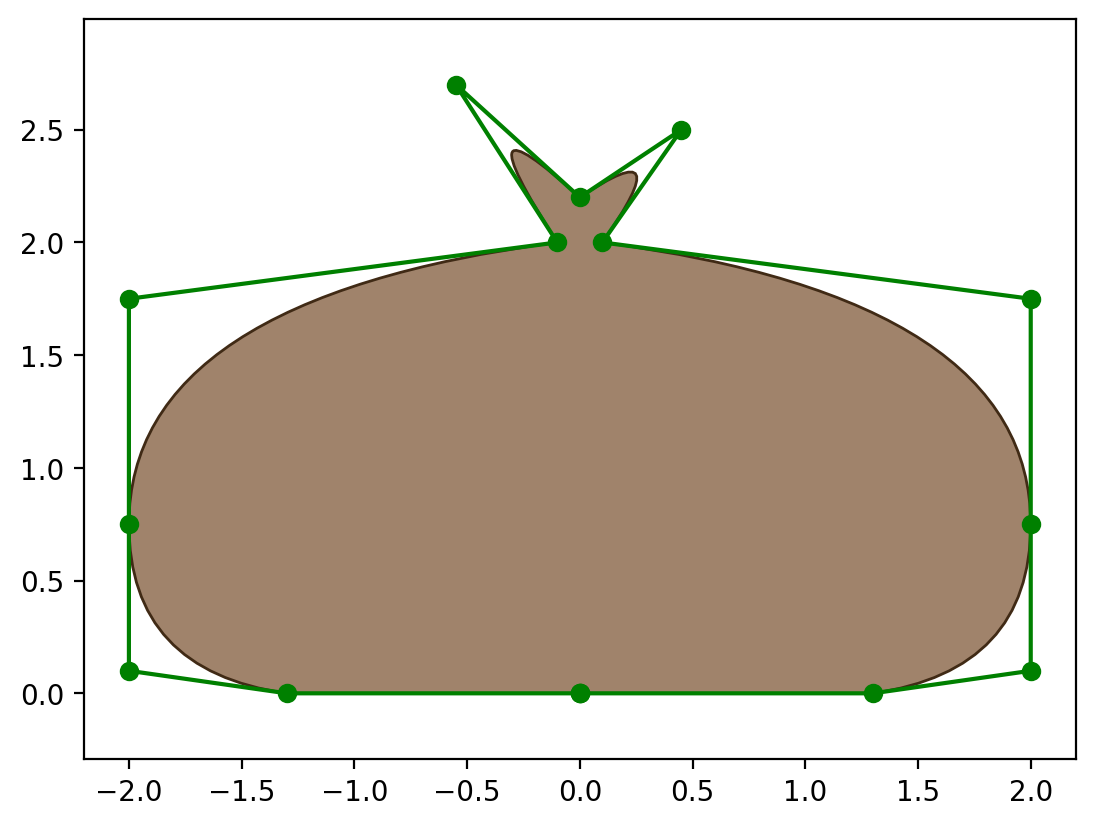

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.patches as mpatches
import matplotlib.path as mpath

fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (0, 0)),
    (Path.CURVE3, (0, 0)),
    (Path.CURVE3, (-1.3, 0)),
    (Path.CURVE3, (-2, 0.1)),
    (Path.CURVE3, (-2, 0.75)),
    (Path.CURVE3, (-2, 1.75)),
    (Path.CURVE3, (-0.1, 2)),
    (Path.CURVE3, (-0.55, 2.7)),
    (Path.CURVE3, (0, 2.2)),
    (Path.CURVE3, (0.45, 2.5)),
    (Path.CURVE3, (0.1, 2.0)),
    (Path.CURVE3, (2, 1.75)),
    # (Path.LINETO, (0.85, 1.15)),
    # (Path.CURVE4, (2.2, 0)),
    # (Path.CURVE4, (3, 0)),
    (Path.CURVE3, (2.0, 0.75)),
    (Path.CURVE3, (2, 0.1)),
    (Path.CURVE3, (1.3, 0.0)),
    (Path.CLOSEPOLY, (0, 0.0)),
]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor="#A0836B", alpha=1, edgecolor="#402A15")
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

#ax.grid()
ax.axis("equal")
plt.show()

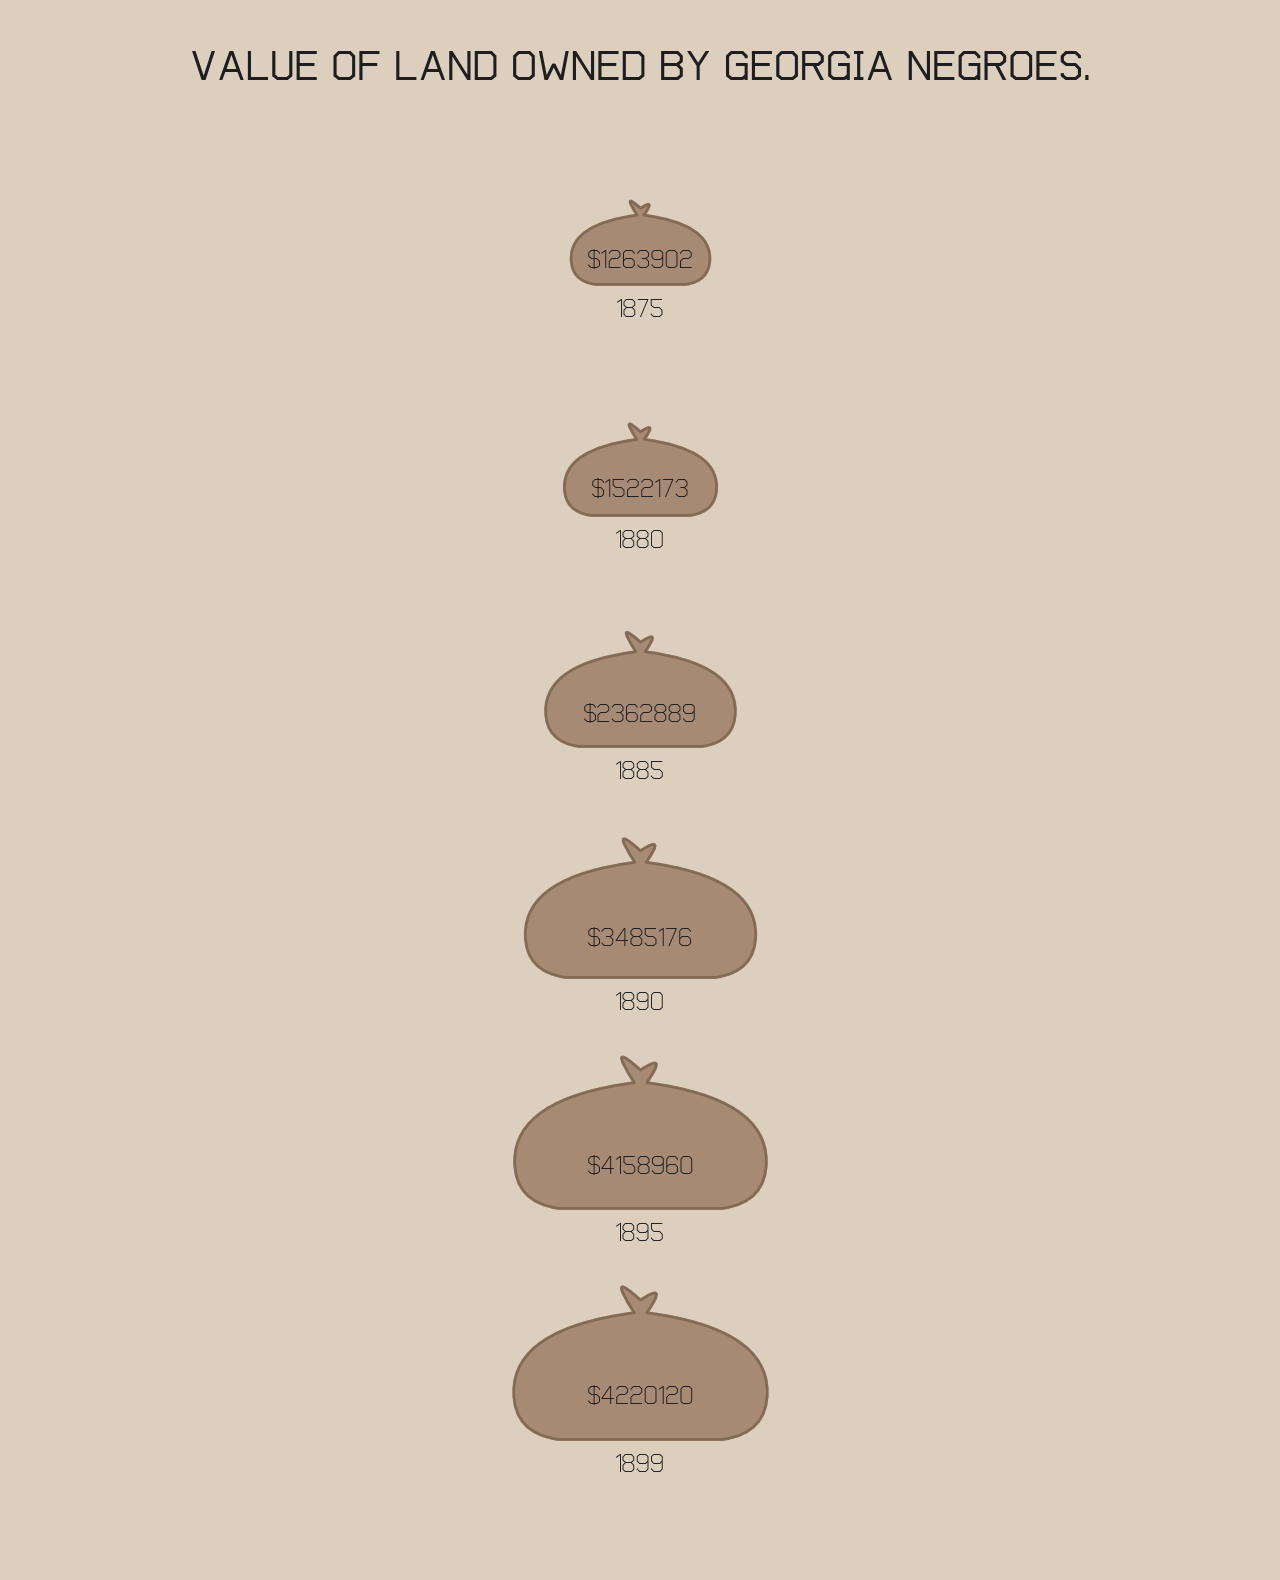

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D

positions = np.array([[0, 2.1*i] for i in range(len(df_plate_18.Year),0, -1)])
data = zip(df_plate_18.Year, df_plate_18["Land Value (Dollars)"], positions)

fig, ax = plt.subplots(figsize=(8, 10), facecolor="#DDCFBE")
for year, total, position in data:
    t = Affine2D().scale(np.sqrt(total)*0.01,)
    m = MarkerStyle(mpath.Path(verts, codes), transform=t)
    o = MarkerStyle(mpath.Path(verts, codes), transform=t, fillstyle='none')
    ax.plot(position[0], position[1], marker=m, color="#A0836B", alpha=0.9)
    ax.plot(position[0], position[1], marker=o, color="#402A15", alpha=0.3)
    ax.text(position[0], position[1]+(np.sqrt(total)*0.00018), f'${total}', fontsize=9, color="#1D1E20", ha="center", va='center',font=cobol_regular) #np.sqrt(total, fontsize=9, color="#1D1E20", ha="center", va='center',font=cobol_regular)
    ax.text(position[0], position[1]-0.3, year, fontsize=9, color="#1D1E20", ha="center", font=cobol_regular)

ax.set_xlim(-2, 2)
ax.set_ylim(1, 15)

ax.axis('off')

ax.set_title("Value of Land owned by georgia negroes.".upper(), color="#1D1E20", font=cobol_bold, fontsize=15, y=0.95 )
#plt.subplots_adjust(top=1)

plt.show()